In [1]:
import math
import numpy as np
import pandas as pd
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed,AveragePooling1D,Flatten

Using TensorFlow backend.


In [2]:
df = pd.read_csv('finalset/patient_data_24_hours.csv')
df.head(50)

,SUBJECT_ID,TimeStamp,Albumin,Alk. Phosphate,ALT,AST,Total Bili,BUN,Cholesterol,Creatinine,...,Platelets,Respiratory Rate,SaO2,Arterial BP [Systolic],Temperature C,TroponinI,TroponinT,Urine,WBC,Previous WeightF
0,17,0 days 00:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.013433,...,0.103116,0.143564,0.990099,0.445489,0.0,0.0,0.0,0.0,0.021739,0.000000
1,17,1 days 00:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.055556,0.0,0.012687,...,0.177300,0.247525,0.990099,0.387218,0.0,0.0,0.0,0.0,0.047259,0.000000
2,17,0 days 23:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.055556,0.0,0.012687,...,0.177300,0.247525,0.990099,0.387218,0.0,0.0,0.0,0.0,0.047259,0.000000
3,17,0 days 22:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.055556,0.0,0.012687,...,0.177300,0.287129,0.990099,0.372180,0.0,0.0,0.0,0.0,0.047259,0.000000
4,17,0 days 21:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.055556,0.0,0.012687,...,0.177300,0.267327,0.990099,0.357143,0.0,0.0,0.0,0.0,0.047259,0.000000
5,17,0 days 20:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.055556,0.0,0.012687,...,0.177300,0.316832,0.990099,0.334586,0.0,0.0,0.0,0.0,0.047259,0.000000
6,17,0 days 19:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.055556,0.0,0.012687,...,0.177300,0.237624,0.990099,0.383459,0.0,0.0,0.0,0.0,0.047259,0.000000
7,17,0 days 17:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.055556,0.0,0.012687,...,0.177300,0.262376,0.990099,0.300752,0.0,0.0,0.0,0.0,0.047259,0.000000
8,17,0 days 16:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.055556,0.0,0.012687,...,0.177300,0.198020,0.990099,0.327068,0.0,0.0,0.0,0.0,0.047259,0.000000
9,17,0 days 15:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.055556,0.0,0.012687,...,0.177300,0.217822,0.990099,0.421053,0.0,0.0,0.0,0.0,0.047259,0.000000


In [3]:
matrix3D = np.array(df.drop(['SUBJECT_ID', 'TimeStamp'], 1))
matrix3D

array([[0.        , 0.        , 0.        , ..., 0.        , 0.02173913,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04725898,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04725898,
        0.        ],
       ...,
       [0.79032258, 0.        , 0.00266276, ..., 0.        , 0.01587902,
        0.        ],
       [0.79032258, 0.        , 0.00266276, ..., 0.        , 0.01039698,
        0.        ],
       [0.79032258, 0.        , 0.00266276, ..., 0.        , 0.01587902,
        0.        ]])

In [4]:
matrix3D.shape

(164675, 37)

In [5]:
matrix3D = np.array(matrix3D).reshape((6587, 25, 37))
matrix3D.shape

(6587, 25, 37)

In [6]:
outcomes = pd.read_csv('finalset/outcomes.csv')
outcomes.head(10)

,SUBJECT_ID,LABEL
0,17,0
1,21,0
2,23,0
3,34,0
4,36,1
5,61,0
6,68,1
7,85,0
8,94,0
9,103,1


In [7]:
Y = np.array(outcomes.drop(['SUBJECT_ID'], 1))
Y.shape

(6587, 1)

In [8]:
X = matrix3D
X.shape

(6587, 25, 37)

In [9]:
X_train = X[:5270]
X_test = X[5270:]
Y_train = Y[:5270]
Y_test = Y[5270:]
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(5270, 25, 37)

(1317, 25, 37)

(5270, 1)

(1317, 1)

In [26]:
model = Sequential()
model.add(LSTM(37, input_shape=(25, 37),return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
print(model.summary())
h = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10,batch_size=8,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 25, 37)            11100     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 25, 1)             38        
_________________________________________________________________
flatten_3 (Flatten)          (None, 25)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 26        
Total params: 11,164
Trainable params: 11,164
Non-trainable params: 0
_________________________________________________________________
None
Train on 5270 samples, validate on 1317 samples
Epoch 1/10
5270/5270 [==============================] - 18s 3ms/step - loss: 0.2262 - acc: 0.6522 - val_loss: 0.3012 - val_acc: 0.4267
Epoch 2/10
5270/5270 [==============================] - 17s 3ms/step - loss: 0.223

In [27]:
h.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [28]:
import matplotlib.pyplot as plt

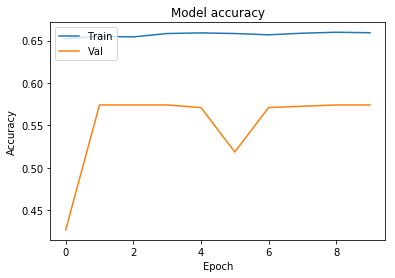

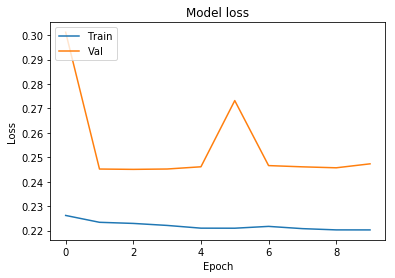

In [30]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [19]:
scores = model.evaluate(X_test, Y_test)
scores[1]*100

1317/1317 [==============================] - 0s 138us/step


55.884586189765315

In [25]:
X_trainz = (X_train - np.mean(X_train))/np.std(X_train)
X_trainz

array([[[-0.52433825, -0.52433825, -0.52433825, ..., -0.52433825,
         -0.43351284, -0.52433825],
        [-0.52433825, -0.52433825, -0.52433825, ..., -0.52433825,
         -0.32689171, -0.52433825],
        [-0.52433825, -0.52433825, -0.52433825, ..., -0.52433825,
         -0.32689171, -0.52433825],
        ...,
        [-0.52433825, -0.52433825, -0.52433825, ..., -0.52433825,
         -0.32689171, -0.52433825],
        [-0.52433825, -0.52433825, -0.52433825, ..., -0.52433825,
         -0.32689171, -0.52433825],
        [-0.52433825, -0.52433825, -0.52433825, ..., -0.52433825,
         -0.32689171, -0.52433825]],

       [[-0.52433825, -0.45007681, -0.45536366, ..., -0.52433825,
         -0.34979551,  0.43185661],
        [-0.52433825, -0.45007681, -0.45536366, ..., -0.52433825,
         -0.34979551,  0.43185661],
        [-0.52433825, -0.45007681, -0.45536366, ..., -0.52433825,
         -0.34979551,  0.43185661],
        ...,
        [-0.52433825, -0.45007681, -0.45536366, ..., -

In [26]:
X_testz = (X_test - np.mean(X_test))/np.std(X_test)
X_testz

array([[[ 6.16927856, -0.29609609, -0.28211854, ..., -0.29609609,
         -0.29609609, -0.29609609],
        [ 6.16927856, -0.29609609, -0.28211854, ..., -0.29609609,
         -0.29609609, -0.29609609],
        [ 6.16927856, -0.29609609, -0.28211854, ..., -0.29609609,
         -0.29609609, -0.29609609],
        ...,
        [ 6.16927856, -0.29609609, -0.28211854, ..., -0.29609609,
         -0.29609609, -0.29609609],
        [ 6.16927856, -0.29609609, -0.28211854, ..., -0.29609609,
         -0.29609609, -0.29609609],
        [ 6.16927856, -0.29609609, -0.28211854, ..., -0.29609609,
         -0.29609609, -0.29609609]],

       [[ 6.63109103, -0.29609609, -0.2770358 , ..., -0.29609609,
         -0.03809802, -0.29609609],
        [ 6.47715354, -0.29609609, -0.27322374, ..., -0.29609609,
         -0.03809802, -0.29609609],
        [ 6.47715354, -0.29609609, -0.27322374, ..., -0.29609609,
         -0.03809802, -0.29609609],
        ...,
        [ 6.47715354, -0.29609609, -0.27322374, ..., -

In [30]:
from keras.layers import GRU
modelGRU = Sequential()
modelGRU.add(GRU(100, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, reset_after=False,input_shape=(25, 37)))
modelGRU.add(Dense(1, activation='sigmoid'))
modelGRU.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
print(modelGRU.summary())
modelGRU.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,batch_size=8,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 100)               41400     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 41,501
Trainable params: 41,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 5270 samples, validate on 1317 samples
Epoch 1/30
5270/5270 [==============================] - 11s 2ms/step - loss: 0.2269 - acc: 0.6528 - val_loss: 0.2465 - val_acc: 0.5740
Epoch 2/30
5270/5270 [==============================] - 10s 2ms/step - loss: 0.2220 - acc: 0.6577 - val_loss: 0.2456 - val_acc: 0.5740
Epoch 3/30
5270/5270 [==============================] - 10s 2ms/step - loss: 0.2220 - acc: 0.6562 - val_loss: 0.2450 - val_acc: 0.5740
Epoch 4/30
5270/5270 [==============================] - 9s 2ms/step - loss: 

In [36]:
scores = modelGRU.evaluate(X_testz, Y_test)
scores[1]*100

1317/1317 [==============================] - 1s 560us/step


49.12680334318924

In [37]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [42]:
ans = []
class LSTM(object):
    def __init__(self):
        # define lower bound of benchmark function
        self.Lower = 0
        # define upper bound of benchmark function
        self.Upper = 1

    # function which returns evaluate function
    def function(self):
        def evalute(D,sol):
            sol = np.array(sol)
            sol = sigmoid(sol)
            #display(sol)
            op = sol>=0.5
            X_tr = X_train[:,:,op]
            X_te = X_test[:,:,op]
            from keras.models import Sequential
            from keras.layers import GRU,Dense
            modelGRU = Sequential()
            modelGRU.add(GRU(100, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, reset_after=False,input_shape=(25, 37)))
            modelGRU.add(Dense(1, activation='sigmoid'))
            modelGRU.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
            model.fit(X_tr, Y_train, validation_data=(X_te, Y_test), epochs=30,batch_size=50,verbose=0)
            scores = model.evaluate(X_te, Y_test, verbose=0)
            k = -1*scores[1]
            return k
        return evalute

In [ ]:
from NiaPy.algorithms.basic import BatAlgorithm
for i in range(5):
    algorithm = BatAlgorithm(D=37, NP=370, nFES=5, benchmark=LSTM())
    best = algorithm.run()
    ans.append(-1*best[1])

In [ ]:
ans